In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('../data/train.csv')
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [17]:
print("Columns:",train_df.columns)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Questions worth asking from the dataset

* what do the survived passengers have in common ( specific category ) ?
* influence of class
* influence of sex
* influence of age + do children with no parch still get priority and how much ?  
* influence of sibsp , do they get more preference because its a family + parch ? or more for single individuals?
* was there a fare below which passengers didnt survive?
*  which embarkment had the most surivors ? 

### Some real life statistics that can help us drive to some questions 


37% – the percentage of passengers who survived.
* we can check the number people who survived in the dataset
* any outliers/anomalies that showcase a majority or pattern


37% – the percentage of passengers who survived.
* Find what is order of survival for each category such as Class ,children ,sex etc.
* was it easier for class 2 ticketholders to escape or was their fate similar to that of class 3.
* if survival for class 2 > class 3, how much and also find a measure to score/standardize it . 


### Interesting Insights to Look For

Were women more likely to survive?

Was survival influenced by passenger class?

Did younger passengers have better survival rates?

Did family size matter?

Any insights from cabin/deck data?

#### Data types and non-nulls

In [8]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Descriptions

In [12]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Count of unique values

In [11]:
print(train_df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


### Null values count


In [59]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Child            0
AgeGroup       177
FareGroup       15
dtype: int64


## Significance of each category/feature

In [56]:
survival_percentage = train_df['Survived'].mean() * 100
print(f"Survival Rate: {survival_percentage:.2f}%")

Survival Rate: 38.38%


what do the survived passengers have in common ( specific category ) ?

In [32]:
survived_df = train_df[train_df['Survived'] == 1]
print(survived_df.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


#### Influence of Class

In [34]:
print(train_df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


what percentage of first class passengers survived?
* Class 1: 62.96% survived from their class

what percentage of second class passengers survived?
* Class 2: 47.28% survived from their class

what percentage of third  class passengers survived?
* Class 3: 24.24% survived from their class

#### Influence of sex

In [33]:
print(train_df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


* Female : 74.20% females survived
* Male :  18.88% male survived

#### Influence of age

In [ ]:
age_bins = [0, 12, 18, 30, 45, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=labels)

# Survival rate by age group
agegroup_survival = train_df.groupby('AgeGroup')['Survived'].mean() * 100
print(agegroup_survival)



AgeGroup
Child          57.971014
Teen           42.857143
Young Adult    35.555556
Adult          42.574257
Middle-aged    40.740741
Senior         22.727273
Name: Survived, dtype: float64


C:\Users\adi17\AppData\Local\Temp\ipykernel_19104\2275719348.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = train_df.groupby('AgeGroup')['Survived'].mean() * 100


#### Influence of SibSp

In [ ]:
sibsp_survival = train_df.groupby('SibSp')['Survived'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
sibsp_survival.columns = ['Survival Rate', 'Passenger Count']
print(sibsp_survival)


       Survival Rate  Passenger Count
SibSp                                
1           0.535885              209
2           0.464286               28
0           0.345395              608
3           0.250000               16
4           0.166667               18
5           0.000000                5
8           0.000000                7


#### Fare
* was there a fare below which passengers didnt survive?

In [ ]:
print(train_df.groupby('Survived')['Fare'].describe())

          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


* Survivors paid more for their tickets

### Cabin

Cabin had 687 missing values , but there is a possibility that it shows individuals with a cabin or not,

In [71]:
train_df['Cabin'].isnull().mean() * 100

np.float64(77.10437710437711)

more than 77% of passengers dont have assigned cabin

In [87]:
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)
print(train_df.groupby('HasCabin')['Survived'].mean())


HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


almost 69 % individuals who survived had a cabin

In [73]:
missing_cabin_percent = train_df[train_df['HasCabin'] == 0]['Pclass'].value_counts(normalize=True).sort_index() * 100
print(missing_cabin_percent)


Pclass
1     5.822416
2    24.454148
3    69.723435
Name: proportion, dtype: float64


In [94]:
train_df['CabinLetter'] = train_df['Cabin'].astype(str).str[0]


In [75]:
print(train_df.groupby('CabinLetter')['Survived'].mean().sort_values(ascending=False))


CabinLetter
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
n    0.299854
T    0.000000
Name: Survived, dtype: float64


#### Embarkment

*  which embarkment had the most survivors ? 

In [54]:
embarkment_survival_rate = train_df.groupby('Embarked')['Survived'].mean() * 100
print(embarkment_survival_rate.sort_values(ascending=False))


Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


### Correlation between all features

In [101]:
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

In [105]:
train_df['Sex_encoded'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked_encoded'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


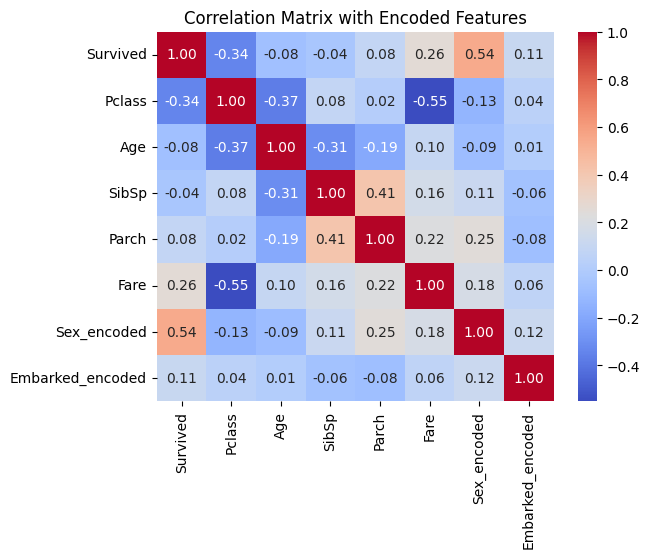

In [106]:
# Then add to numeric features
correlation_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Encoded Features')
plt.show()


1. Sex is the most important feature: Strong correlation (0.54)
2. Pclass matters a lot: -0.34 correlation with survival.Thus,lower class has lower survival chances.
3. Fare is important too :  Those who paid more for their ticket had higher survival rates.

However there is a possibility that two features combined might have higher correlation

## Significance of 2  category/features

### Class and other features

Class and  Sex 

In [100]:
print(train_df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100)



Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


Class vs Age

In [89]:
print(train_df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean() * 100)


Pclass  AgeGroup   
1       Child           75.000000
        Teen            91.666667
        Young Adult     71.111111
        Adult           73.015873
        Middle-aged     56.250000
        Senior          21.428571
2       Child          100.000000
        Teen            50.000000
        Young Adult     41.791045
        Adult           46.296296
        Middle-aged     30.000000
        Senior          33.333333
3       Child           41.666667
        Teen            28.260870
        Young Adult     22.784810
        Adult           17.647059
        Middle-aged      0.000000
        Senior          20.000000
Name: Survived, dtype: float64


C:\Users\adi17\AppData\Local\Temp\ipykernel_19104\3609934545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean() * 100)


Class vs SibSp

In [90]:
print(train_df.groupby(['Pclass', 'SibSp'])['Survived'].mean() * 100)

Pclass  SibSp
1       0         56.204380
        1         74.647887
        2         80.000000
        3         66.666667
2       0         41.666667
        1         58.181818
        2         50.000000
        3        100.000000
3       0         23.646724
        1         32.530120
        2         33.333333
        3          8.333333
        4         16.666667
        5          0.000000
        8          0.000000
Name: Survived, dtype: float64


Class vs Parch

In [91]:
print(train_df.groupby(['Pclass', 'Parch'])['Survived'].mean() * 100)

Pclass  Parch
1       0         60.736196
        1         67.741935
        2         76.190476
        4          0.000000
2       0         35.820896
        1         75.000000
        2         81.250000
        3        100.000000
3       0         22.572178
        1         36.363636
        2         25.581395
        3         33.333333
        4          0.000000
        5         20.000000
        6          0.000000
Name: Survived, dtype: float64


Class vs Fare

In [92]:
print(train_df.groupby(['Pclass', 'FareGroup'])['Survived'].mean() * 100)

Pclass  FareGroup
1       <10           0.000000
        10-20              NaN
        20-50        47.887324
        50-100       73.255814
        100-250      72.727273
        250+         77.777778
2       <10                NaN
        10-20        42.857143
        20-50        58.904110
        50-100       28.571429
        100-250            NaN
        250+               NaN
3       <10          20.625000
        10-20        41.975309
        20-50        18.055556
        50-100       35.714286
        100-250            NaN
        250+               NaN
Name: Survived, dtype: float64


C:\Users\adi17\AppData\Local\Temp\ipykernel_19104\2071933142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby(['Pclass', 'FareGroup'])['Survived'].mean() * 100)


Class vs Cabin

In [95]:
print(train_df.groupby(['Pclass', 'CabinLetter'])['Survived'].mean() * 100)

Pclass  CabinLetter
1       A               46.666667
        B               74.468085
        C               59.322034
        D               75.862069
        E               72.000000
        T                0.000000
        n               47.500000
2       D               75.000000
        E               75.000000
        F               87.500000
        n               44.047619
3       E              100.000000
        F               20.000000
        G               50.000000
        n               23.590814
Name: Survived, dtype: float64


Class vs Embarked

In [97]:
print(train_df.groupby(['Pclass', 'Embarked'])['Survived'].mean() * 100)

Pclass  Embarked
1       C           69.411765
        Q           50.000000
        S           58.267717
2       C           52.941176
        Q           66.666667
        S           46.341463
3       C           37.878788
        Q           37.500000
        S           18.980170
Name: Survived, dtype: float64


### Sex and other features

Sex v Age

In [107]:
print(train_df.groupby(['Sex', 'AgeGroup'])['Survived'].mean() * 100)

Sex     AgeGroup   
female  Child           59.375000
        Teen            75.000000
        Young Adult     75.555556
        Adult           78.082192
        Middle-aged     85.185185
        Senior         100.000000
male    Child           56.756757
        Teen             8.823529
        Young Adult     15.555556
        Adult           22.480620
        Middle-aged     18.518519
        Senior          10.526316
Name: Survived, dtype: float64


C:\Users\adi17\AppData\Local\Temp\ipykernel_19104\2384809776.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby(['Sex', 'AgeGroup'])['Survived'].mean() * 100)


Sex vs SibSp

In [108]:
print(train_df.groupby(['Sex', 'SibSp'])['Survived'].mean() * 100)

Sex     SibSp
female  0        78.735632
        1        75.471698
        2        76.923077
        3        36.363636
        4        33.333333
        5         0.000000
        8         0.000000
male    0        16.820276
        1        31.067961
        2        20.000000
        3         0.000000
        4         8.333333
        5         0.000000
        8         0.000000
Name: Survived, dtype: float64


Sex vs Parch

In [109]:
print(train_df.groupby(['Pclass', 'Parch'])['Survived'].mean() * 100)

Pclass  Parch
1       0         60.736196
        1         67.741935
        2         76.190476
        4          0.000000
2       0         35.820896
        1         75.000000
        2         81.250000
        3        100.000000
3       0         22.572178
        1         36.363636
        2         25.581395
        3         33.333333
        4          0.000000
        5         20.000000
        6          0.000000
Name: Survived, dtype: float64


Sex vs Fare

In [ ]:
print(train_df.groupby(['Pclass', 'FareGroup'])['Survived'].mean() * 100)

Pclass  FareGroup
1       <10           0.000000
        10-20              NaN
        20-50        47.887324
        50-100       73.255814
        100-250      72.727273
        250+         77.777778
2       <10                NaN
        10-20        42.857143
        20-50        58.904110
        50-100       28.571429
        100-250            NaN
        250+               NaN
3       <10          20.625000
        10-20        41.975309
        20-50        18.055556
        50-100       35.714286
        100-250            NaN
        250+               NaN
Name: Survived, dtype: float64


C:\Users\adi17\AppData\Local\Temp\ipykernel_19104\2071933142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby(['Pclass', 'FareGroup'])['Survived'].mean() * 100)


Sex vs Cabin

In [ ]:
print(train_df.groupby(['Pclass', 'CabinLetter'])['Survived'].mean() * 100)

Pclass  CabinLetter
1       A               46.666667
        B               74.468085
        C               59.322034
        D               75.862069
        E               72.000000
        T                0.000000
        n               47.500000
2       D               75.000000
        E               75.000000
        F               87.500000
        n               44.047619
3       E              100.000000
        F               20.000000
        G               50.000000
        n               23.590814
Name: Survived, dtype: float64


Sex vs Embarked

In [112]:
print(train_df.groupby(['Pclass', 'Embarked'])['Survived'].mean() * 100)

Pclass  Embarked
1       C           69.411765
        Q           50.000000
        S           58.267717
2       C           52.941176
        Q           66.666667
        S           46.341463
3       C           37.878788
        Q           37.500000
        S           18.980170
Name: Survived, dtype: float64
